## Scientific Computation Lab 3

In the first two tasks of this lab, we will continue using timing tests to build our understanding of the cost of different operations in Python. Keep in mind that timing results can be unreliable for operations that are very fast. In such cases, it can be helpful to repeat the operation several times and to then compute the average time taken per repetition. It can also be helpful to experiment with different timers, particularly if you are using Windows (e.g. see the documentation here: https://docs.python.org/3/library/time.html)

We typically aim to compare timing results with estimates of the time complexity. The following reference contains useful information about the expected cost of various operations with a few Python containers: https://wiki.python.org/moin/TimeComplexity




### Task 1: Analyzing the cost of the Python hash function

1) We have stated that the cost of lookup in a Python dictionary is independent of the size of the dictionary, but what about the length of the key? Analyze the time required to compute the hash of strings with a range of lengths using the Python built-in hash function. The range of lengths should span several orders of magnitude and initially, you can try a maximum length of $10^5$. Depending on your computer, you may be able to consider longer lengths. You should make a log-log plot of the wall time vs. string length.

**Notes:**
1. np.logspace can be used to generate the string lengths if dtype=int is used 
2. A simple way to construct a string with length N is: 'a' * N
3. Python stores the hash of a string once it is computed, so timeit will give misleading results as the hash will only be computed during the first iteration of the loop used by timeit.

In [5]:
import numpy as np
import time

lengths = np.logspace(3, 7, 50, dtype = int)
times = []
for i in lengths:
    stringlist = 'lengths'*10**5
    t1 = time.time()
    hash(stringlist)
    t2 = time.time()
    dt = t2 - t1
    times.append(dt)
print(times)

[0.00025916099548339844, 0.0002601146697998047, 0.0002980232238769531, 0.0002601146697998047, 0.0003600120544433594, 0.0002999305725097656, 0.00026106834411621094, 0.00038695335388183594, 0.00038504600524902344, 0.0003006458282470703, 0.0007607936859130859, 0.0003218650817871094, 0.0002560615539550781, 0.0002551078796386719, 0.0002548694610595703, 0.0002551078796386719, 0.0002548694610595703, 0.0002818107604980469, 0.0002570152282714844, 0.0002560615539550781, 0.0002560615539550781, 0.00039196014404296875, 0.0003409385681152344, 0.0003781318664550781, 0.0002579689025878906, 0.0002589225769042969, 0.0007622241973876953, 0.0004649162292480469, 0.0005440711975097656, 0.00044417381286621094, 0.0002963542938232422, 0.00028395652770996094, 0.0003349781036376953, 0.0002918243408203125, 0.0002758502960205078, 0.0003247261047363281, 0.0002589225769042969, 0.0002560615539550781, 0.00025582313537597656, 0.0002560615539550781, 0.00025582313537597656, 0.00028896331787109375, 0.0005359649658203125, 

N= 1
N= 3
N= 10
N= 31
N= 100
N= 316
N= 1000
N= 3162
N= 10000
N= 31622
N= 100000
N= 316227
N= 1000000


Text(0, 0.5, 'wall time (ns)')

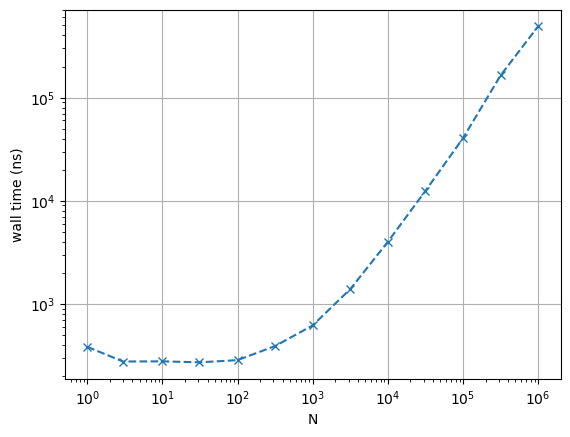

In [14]:
from time import time
from time import perf_counter_ns as time #alternate timer
import numpy as np
import matplotlib.pyplot as plt
Nvals = np.logspace(0,6,13,dtype=int)
Nstrings = 10
tvals = []
for N in Nvals:
    print("N=",N)
    L = []
    for i in range(Nstrings):
        L.append('a'*N)
    t1 = time()
    for i in range(Nstrings):
        i = hash(L[i])
    t2 = time()
    tvals.append((t2-t1)/Nstrings)
    
plt.figure()
plt.loglog(Nvals,tvals,'x--')
plt.grid()
plt.xlabel('N')
plt.ylabel('wall time (ns)')

2) Assume that for sufficiently large string lengths that $t \sim N^a$ where $t$ is the wall time and $N$ is the string length. Estimate $a$ by computing a linear least-squares fir to, $log(t) = a log(N) + b$. The coefficients $a$ and $b$ can be computed with *np.polyfit* or something similar.


In [6]:
logt = np.log(times)
logn = np.log(lengths)
np.polyfit(logt, logn, 1)

array([ 0.06713109, 12.05447146])

a,b= 1.0598533628406355 -1.5150762290690383


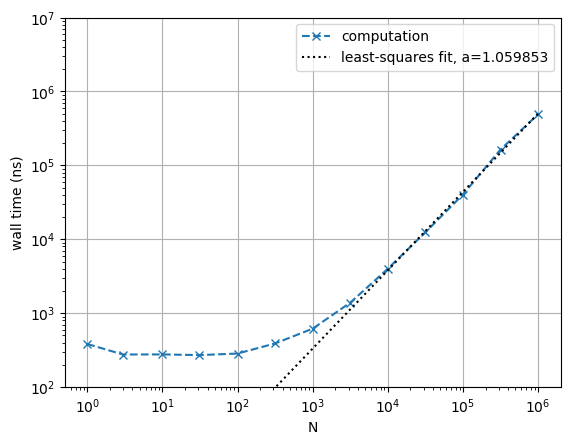

In [15]:
a,b = np.polyfit(np.log(Nvals[8:]),np.log(tvals[8:]),1)
print("a,b=",a,b)
plt.figure()
plt.loglog(Nvals,tvals,'x--',label='computation')
plt.loglog(Nvals,np.exp(b)*Nvals**a,'k:',label='least-squares fit, a=%f' %(a))
plt.grid()
plt.xlabel('N')
plt.ylabel('wall time (ns)')
plt.ylim([10**2,10**7])
plt.legend()

An important general point to keep in mind is that strings are containers (like lists and dictionaries), and when carrying out tasks with containers, it is important to carefully consider if/how the cost of the task depends on the size of the container.

### Task 2: String matching efficiency

Our simple pattern-search algorithm utilizes a character-by-character comparison of the pattern with sub-strings in the larger genetic sequence:

In [7]:
infile = open('test_sequence.txt','r') #file should be in same folder as this notebook
S = infile.read() #(long) gene sequence
infile.close()
P = 'TCGATCGGAAGT' #example pattern

imatch=[] #list of match locations
n,m=len(S),len(P)

#Iterate through data
for ind in range(0,n-m+1):
    if ind%1000000==0: print("ind=",ind)
    match=True
    for j in range(m): #character-by-character comparison
        if P[j] != S[ind+j]:
            match=False
            break
    if match:
        print("match found!, ind=",ind)
        imatch.append(ind)
            

ind= 0
ind= 1000000
ind= 2000000
ind= 3000000
match found!, ind= 3268774
ind= 4000000
ind= 5000000
ind= 6000000
ind= 7000000
ind= 8000000
ind= 9000000
ind= 10000000
ind= 11000000
ind= 12000000
ind= 13000000
ind= 14000000
ind= 15000000
ind= 16000000
ind= 17000000
ind= 18000000
ind= 19000000
ind= 20000000
ind= 21000000
ind= 22000000
ind= 23000000


In Python, it is possible to directly compare strings. For example, given two strings, S1 and S2, we can simply check if S1==S2. We don't know (without doing a little research) the algorithm Python uses for this comparison or if it will be better than the approach used in our pattern search code.

1) How does the use of direct string comparison affect the speed of the pattern search code? Create a new function which replaces the character-by-character comparison with a direct comparison. Compare the time required by each function.

In [16]:
from time import time

def psearch1(S,P):
    imatch=[] #list of match locations
    n,m=len(S),len(P)

    #Iterate through data
    for ind in range(0,n-m+1):
        match=True
        for j in range(m): #character-by-character comparison
            if P[j] != S[ind+j]:
                match=False
                break
        if match:
            print("match found!, ind=",ind)
            imatch.append(ind)
    return imatch

def psearch2(S,P):
    imatch=[] #list of match locations
    n, m=len(S), len(P)

    #Iterate through data
    for ind in range(0,n-m+1):
        match=True   
        if P!=S[ind:ind+m]: #direct comparison
            match=False
        if match:
            print("match found!, ind=",ind)
            imatch.append(ind)
    return imatch

P = S[242:453] #set pattern

#original algorithm
t1 = time()
psearch1(S,P)
t2 = time()
dt1 = t2 - t1

#modified algorithm
t1 = time()
psearch2(S,P)
t2 = time()
dt2 = t2 - t1
print("dt1=",dt1)
print("dt2=",dt2)


match found!, ind= 242
match found!, ind= 700
match found!, ind= 1158
match found!, ind= 1616
match found!, ind= 2074
match found!, ind= 2532
match found!, ind= 2990
match found!, ind= 3448
match found!, ind= 3906
match found!, ind= 4364
match found!, ind= 4822
match found!, ind= 242
match found!, ind= 700
match found!, ind= 1158
match found!, ind= 1616
match found!, ind= 2074
match found!, ind= 2532
match found!, ind= 2990
match found!, ind= 3448
match found!, ind= 3906
match found!, ind= 4364
match found!, ind= 4822
dt1= 9.731788158416748
dt2= 4.8604748249053955


2) Use numerical tests to construct an estimate of the asymptotic time complexity of direct string comparison. How does it compare to character-by-character comparison? What happens if the two strings match or "nearly" match?

In [12]:
import timeit

Np1 = 10000 #length of pattern
i1 = 372 #arbitrary indices
i2 = 98241

#Compare S1 and S2
S1 = S[i1:i1+Np1]
S2 = S[i2:i2+Np1]
t1 = time(); S1 == S2; t2 = time()
dt1 = t2 - t1

#Repeat with strings twice as long
Np2 = Np1 * 2
i1 = 372 #arbitrary indices
i2 = 98241

S1 = S[i1:i1+Np2]
S2 = S[i2:i2+Np2]
t1 = time(); S1 == S2; t2 = time()
dt2 = t2 - t1

print("N1=%d,dt1=%f"%(Np1,dt1))
print("N2=%d,dt2=%f"%(Np2,dt2))

print("S1[0:5]=", S1[0:5])
print("S2[0:5]=", S2[0:5])



N1=10000,dt1=0.000046
N2=20000,dt2=0.000041
S1[0:5]= CGCGT
S2[0:5]= GGATC


### Task 3: Building a simple graph in NetworkX

1. Create an edge list for the graph shown below and then use the edge list to create and display a NetworkX graph. Number the nodes from $1$ to $8$ with node $1$ corresponding to the central high-degree node.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Star_network_7.svg/180px-Star_network_7.svg.png">

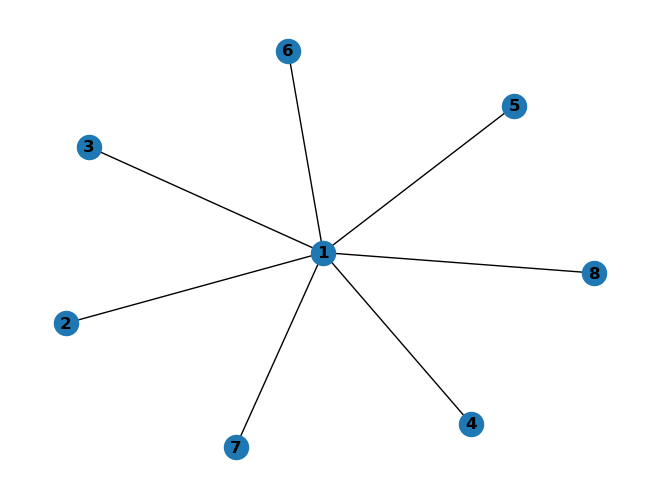

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
e = [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8)]
G.add_edges_from(e)
plt.figure()
nx.draw(G, with_labels=True, font_weight='bold')

2) Create a list of the degrees in the graph using the *degree* method

In [11]:
G.degree()

DegreeView({1: 7, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1})